## 1. Import Libraries

In [27]:
import numpy as np 

import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Daata

In [5]:
file_path = r"C:\Users\vaibh\OneDrive\Desktop\Flight_Sagemaker_Project\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-01,Delhi,Cochin,05:35:00,08:50:00,195,0.0,No Info,6541
1,Jet Airways,2019-05-27,Delhi,Cochin,09:00:00,19:00:00,600,1.0,In-flight meal not included,10675
2,Jet Airways,2019-03-27,Delhi,Cochin,11:30:00,18:50:00,440,1.0,No Info,12242
3,Jet Airways,2019-06-24,Delhi,Cochin,13:00:00,04:25:00,925,1.0,In-flight meal not included,10262
4,Jet Airways,2019-03-24,Kolkata,Banglore,16:55:00,19:40:00,1605,1.0,In-flight meal not included,11134
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-06-12,Delhi,Cochin,08:45:00,13:15:00,270,1.0,No check-in baggage included,5158
636,Air India,2019-03-03,Delhi,Cochin,21:30:00,19:15:00,1305,2.0,No Info,12497
637,Jet Airways,2019-06-27,Delhi,Cochin,20:55:00,04:25:00,450,1.0,In-flight meal not included,12898
638,Air India,2019-05-15,Delhi,Cochin,05:15:00,06:50:00,1535,1.0,No Info,8425


In [6]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [14]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [15]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### 3. High-Level Summary of Data

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [18]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,651.859375,0.812500,9045.723438
std,512.181406,0.658993,4515.356829
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5403.000000
50%,550.000000,1.000000,8452.000000
75%,956.250000,1.000000,12242.000000
max,2315.000000,3.000000,54826.000000


In [21]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="object")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,234,252,252,343.0,493


## 4. High-level analysis of missing values

## 5. High-leval analysis of outliers

In [23]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [25]:
(
    train
    .assign(outlier=forest.fit_predict(train
    .drop(columns="price")
    .select_dtypes(include="number")))

    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Indigo,2019-06-01,Delhi,Cochin,2024-06-09 05:35:00,2024-06-09 08:50:00,195,0.0,No Info,6541,-1
2,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-09 11:30:00,2024-06-09 18:50:00,440,1.0,No Info,12242,-1
4,Jet Airways,2019-03-24,Kolkata,Banglore,2024-06-09 16:55:00,2024-06-09 19:40:00,1605,1.0,In-flight meal not included,11134,-1
7,Multiple Carriers,2019-03-09,Delhi,Cochin,2024-06-09 17:50:00,2024-06-09 01:35:00,465,2.0,No Info,23583,-1
13,Jet Airways,2019-05-24,Banglore,Delhi,2024-06-09 08:20:00,2024-06-09 11:20:00,180,0.0,In-flight meal not included,4030,-1
...,...,...,...,...,...,...,...,...,...,...,...
633,Multiple Carriers,2019-06-15,Delhi,Cochin,2024-06-09 15:05:00,2024-06-09 01:30:00,625,2.0,No Info,15965,-1
635,Spicejet,2019-06-12,Delhi,Cochin,2024-06-09 08:45:00,2024-06-09 13:15:00,270,1.0,No check-in baggage included,5158,-1
636,Air India,2019-03-03,Delhi,Cochin,2024-06-09 21:30:00,2024-06-09 19:15:00,1305,2.0,No Info,12497,-1
637,Jet Airways,2019-06-27,Delhi,Cochin,2024-06-09 20:55:00,2024-06-09 04:25:00,450,1.0,In-flight meal not included,12898,-1


## 6. Pair Plots

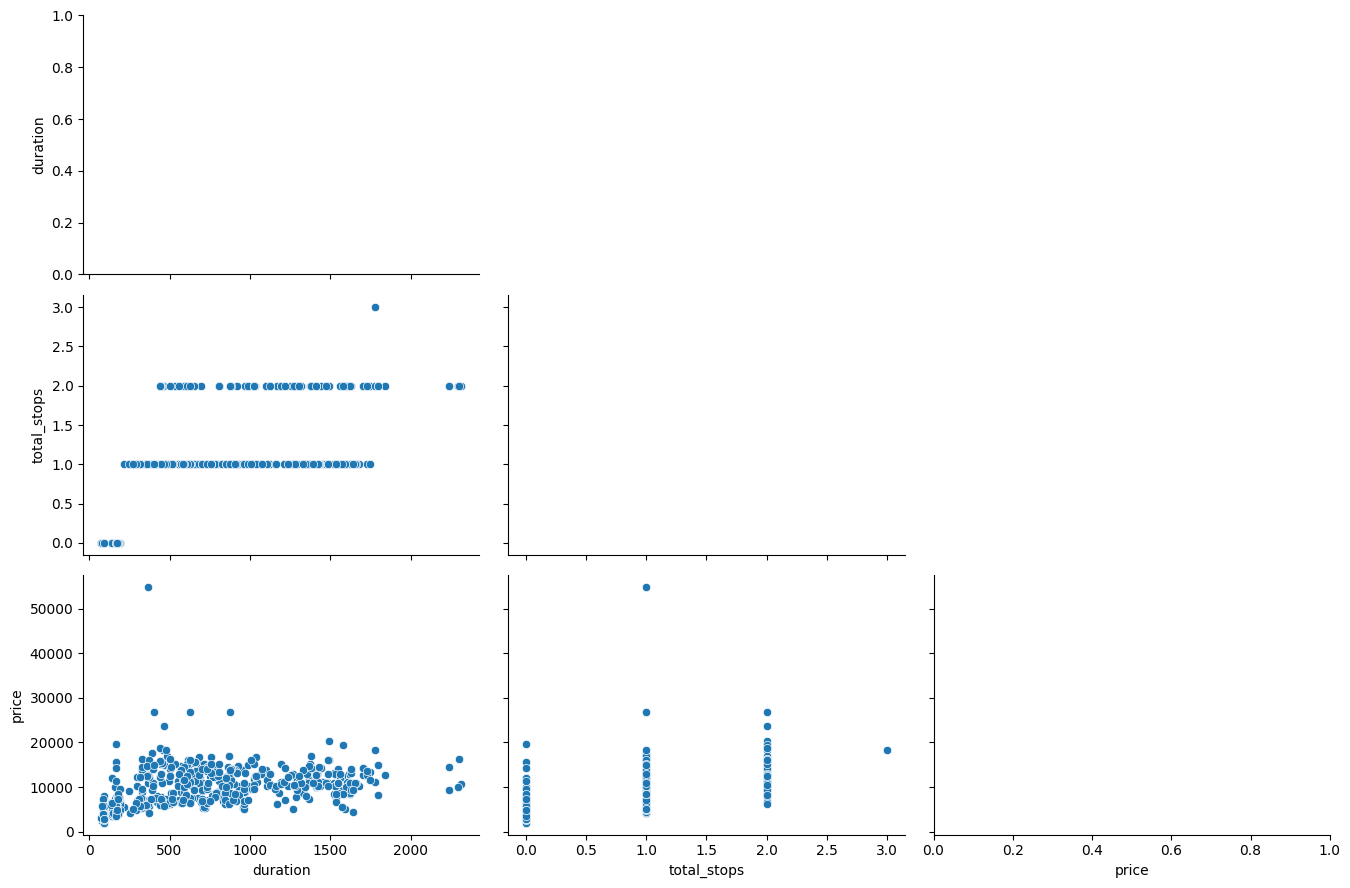

In [28]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

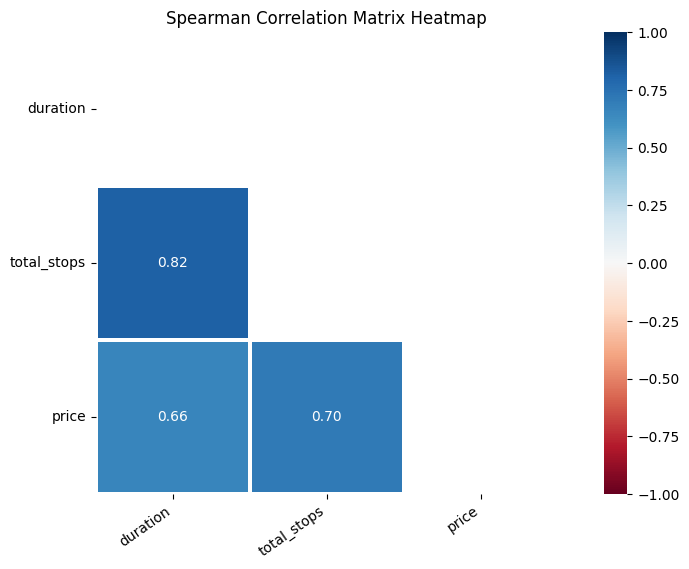

In [29]:
eda_helper_functions.correlation_heatmap(train)

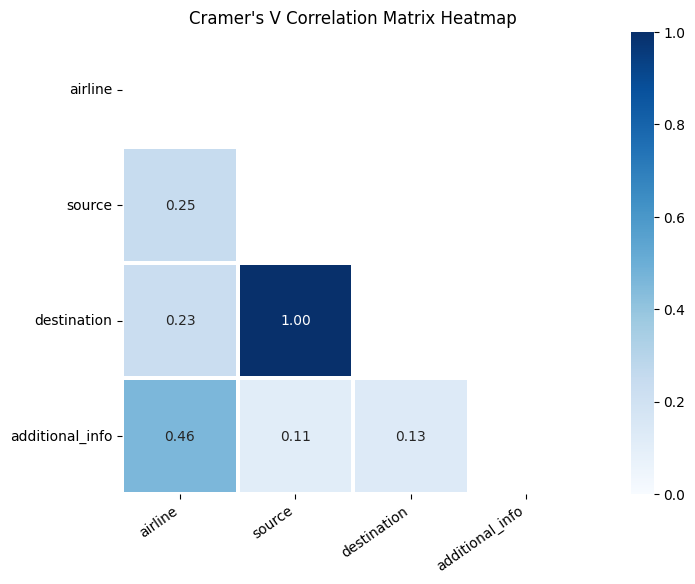

In [30]:
eda_helper_functions.cramersV_heatmap(train)

## Detailed Analysis of each Feature: